# Stats from Goodreads Bookshelf

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets

In [2]:
csvPath = os.path.join(".", "goodreads_library_export.csv")

In [40]:
booklist = pd.read_csv(csvPath)
print(booklist.dtypes)



Book Id                         int64
Title                          object
Author                         object
Author l-f                     object
Additional Authors             object
ISBN                           object
ISBN13                         object
My Rating                       int64
Average Rating                float64
Publisher                      object
Binding                        object
Number of Pages               float64
Year Published                float64
Original Publication Year     float64
Date Read                      object
Date Added                     object
Bookshelves                    object
Bookshelves with positions     object
Exclusive Shelf                object
My Review                     float64
Spoiler                       float64
Private Notes                 float64
Read Count                      int64
Owned Copies                    int64
dtype: object


### Filtering

In [41]:
read = booklist[booklist["Exclusive Shelf"] == "read"].reset_index(drop=True)
to_read = booklist[booklist["Exclusive Shelf"] == "to-read"].reset_index(drop=True)
reading = booklist[booklist["Exclusive Shelf"] == "currently-reading"].reset_index(drop=True)


# Books by year


Date Read
2021         54
2023         41
2022         37
2020         36
2024         17
dtype: int64


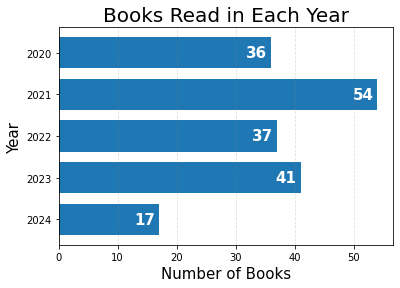

In [42]:
byYearRead = read[["Title","Date Read"]]
byYearRead = byYearRead[byYearRead["Date Read"] == byYearRead["Date Read"]]
byYearRead["Date Read"] = [int(str(x)[0:4]) for x in byYearRead["Date Read"]]
x = np.arange(byYearRead["Date Read"].max(), byYearRead["Date Read"].min()-1,-1)

countMap = byYearRead.value_counts(subset=["Date Read"])

bar_fig, bar_ax = plt.subplots()

bar_ax.set_title("Books Read in Each Year", fontsize=20)
bar_ax.set_xlabel("Number of Books", fontsize=15)
years = [str(i) for i in x]
counts = [countMap[i] for i in x]
print(byYearRead.value_counts(subset=["Date Read"]))

rects = bar_ax.barh(years, counts, align="center", height=0.75)
bar_ax.bar_label(rects, counts, padding=-25, color="white", fontweight="bold", fontsize=15)

bar_ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=0.25)
bar_ax.set_ylabel("Year", fontsize=15)
pass

# General Scatterplot

In [43]:
cols = [i for i in list(booklist) if pd.api.types.is_numeric_dtype(booklist[i])]

listSelection = {
    "read": widgets.Checkbox(
        value=True,
        description="read",
        disabled=False,
        indent=False
    ),
    "toRead": widgets.Checkbox(
        value=False,
        description="to read",
        disabled=False,
        indent=False
    ),
    "continueReading": widgets.Checkbox(
        value=False,
        description="continue reading",
        disabled=False,
        indent=False
    )
}
# selectionBox = widgets.HBox(children=listSelection)

axisChoices = [
    widgets.Dropdown(
        options=cols,
        value=cols[0],
        description="X axis = ",
        disabled=False
    ),
    widgets.Dropdown(
        options=cols,
        value=cols[0],
        description="Y axis = ",
        disabled=False
    ),
]

chartType = widgets.
# axisBox = widgets.VBox(children=axisChoices)

# display(selectionBox)
# display(axisBox)

@widgets.interact(readChoice=listSelection["read"], 
                  toReadChoice=listSelection["toRead"], 
                  continueReadingChoice=listSelection["continueReading"],
                  xAxis=axisChoices[0],
                  yAxis=axisChoices[1])
def on_change(readChoice, toReadChoice, continueReadingChoice, xAxis, yAxis):
    print((readChoice,toReadChoice,continueReadingChoice))
    print(xAxis, yAxis)
    scatter_fig, scatter_plt = plt.subplots()
    
    plotList = []
    if readChoice: plotList.append(read)
    if toReadChoice: plotList.append(to_read)
    if continueReadingChoice: plotList.append(reading)
    if(len(plotList) == 0): plotList.append(booklist)
    chosenList = pd.concat(plotList, ignore_index=True, sort=False)
    
    scatter_plt.scatter(x=chosenList[xAxis], y=chosenList[yAxis])
# outputs = widgets.interact(on_change, read=listSelection["read"])

# for i in listSelection: i.observe(on_change, names="value") 

interactive(children=(Checkbox(value=True, description='read', indent=False), Checkbox(value=False, descriptio…

In [50]:

histchoice = widgets.Dropdown(
        options=cols,
        value=cols[0],
        description="Value = ",
        disabled=False
    )

binSlider = widgets.IntSlider(
    value=7,
    min=3,
    max=100,
    step=1,
    description='Bin Count:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

@widgets.interact(readChoice=listSelection["read"], 
                  toReadChoice=listSelection["toRead"], 
                  continueReadingChoice=listSelection["continueReading"],
                  histChoice=histchoice,
                  binCount=binSlider)
def process_hist_choice(readChoice, toReadChoice, continueReadingChoice, histChoice, binCount):
    hist_fig, hist_plt = plt.subplots()
    
    plotList = []
    if readChoice: plotList.append(read)
    if toReadChoice: plotList.append(to_read)
    if continueReadingChoice: plotList.append(reading)
    if(len(plotList) == 0): plotList.append(booklist)
    chosenList = pd.concat(plotList, ignore_index=True, sort=False)
    
    hist_plt.hist(chosenList[histChoice], binCount)

interactive(children=(Checkbox(value=True, description='read', indent=False), Checkbox(value=False, descriptio…